## Food Productivity Analysis in Karamoja Uganda
<p>The project analyzes maize and sorghum production in Karamoja, Uganda, comparing crop yields with population and land area across the region. Using Python and the provided data, we  identify high and low performing areas, and examine key metrics such as yield per capita and total production. 

<p>The data cleaning and Exploratory analysis of the Karamoja Data sets seeks to establish trends and drive insights for improved resource allocation, agricultural planning, and informed decision-making in the region.

Importing the necessary Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import geopandas as gpd




Loading data

In [2]:
#Load CSV Files
df1district=pd.read_csv('Data/Uganda.Karamoja.District.csv')
df2subcounty=pd.read_csv('Data/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
# Load shapefiles
subcountiesarea = gpd.read_file("Data/SHAPEFILES/Uganda_Subcounties.shp")
maize_area = gpd.read_file("Data/SHAPEFILES/Crop_Type_Map_Maize.shp")
sorghum_area = gpd.read_file("Data/SHAPEFILES/Crop_Type_Map_Sorghum.shp")



AttributeError: module 'fiona' has no attribute 'path'

Making copies of the dataframes

In [ ]:
df1districtcopy=df1district.copy()
df2subcountycopy=df2subcounty.copy()

Understanding the data

In [ ]:
df1district.head(10)

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [ ]:
df1district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [ ]:
df1district.isnull().sum()

OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64

No missing values detected

Checking for duplicates

In [ ]:
df1district.duplicated().sum()

0

There are no duplicates in the dataframe

Checking for outliers

In [ ]:
df1district.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


Checking for outliers in both sorghum and maize yields

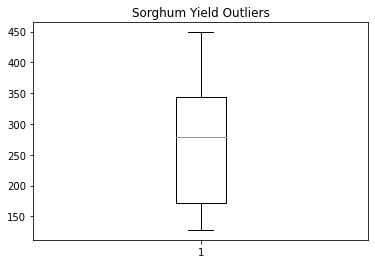

In [ ]:
plt.boxplot(df1district["S_Yield_Ha"])
plt.title("Sorghum Yield Outliers")
plt.show()

There are no outliers detected.the data is consistent

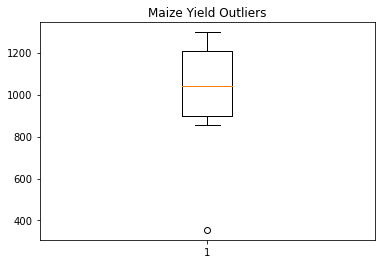

In [ ]:
plt.boxplot(df1district["M_Yield_Ha"])
plt.title("Maize Yield Outliers")
plt.show()

There is a very small yield in Moroto district,however this could be due to various conditions not necessitating removal

In [ ]:
df2subcounty.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


In [ ]:
df2subcounty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [ ]:
df2subcounty.head(10)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,179681.139000
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,10181.201000
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,22772.636430
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,59450.189420
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,209806.097000


In [ ]:
df2subcounty.shape

(52, 13)

Checking if districts match

In [ ]:
df1district["NAME"].unique()
df2subcounty["DISTRICT_NAME"].unique()

array(['KOTIDO', 'KAABONG', 'ABIM', 'AMUDAT', 'MOROTO', 'NAKAPIRIPIRIT',
       'NAPAK'], dtype=object)

checking for missing values

In [ ]:
df2subcounty.isnull().sum()

OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64

There are no missing values in the subcounty data set

In [ ]:
df2subcounty.duplicated().sum()

0

There are no duplicates in the subcounty data

Checking for outliers in both sorghum and maize yields

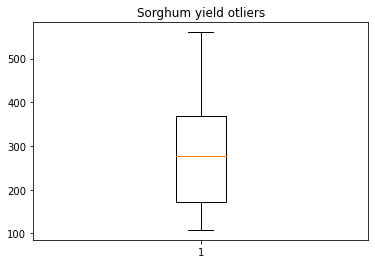

In [ ]:
plt.boxplot(df2subcounty['S_Yield_Ha'])
plt.title('Sorghum yield otliers')
plt.show()

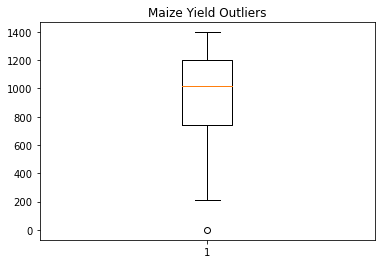

In [ ]:
plt.boxplot(df2subcounty["M_Yield_Ha"])
plt.title("Maize Yield Outliers")
plt.show()

There  are no outliers in the sorghum and maize yield columns for the subcounty dataset. 

## Comparing yields and productivity 

In [ ]:
#District yields
df1district[["S_Yield_Ha","M_Yield_Ha"]].mean()


S_Yield_Ha    269.285714
M_Yield_Ha    986.142857
dtype: float64

In [ ]:
#Subcounty yields
df2subcounty[["S_Yield_Ha","M_Yield_Ha"]].mean()

S_Yield_Ha    274.165405
M_Yield_Ha    940.259552
dtype: float64

Average Maize yield is greater compared to Average sorghum yield,This implies that Maize performs better in both the districts and subcounty levels

#### Checking the yield performance against population and crop area in both districts and subcounties

In [ ]:
df1district[["S_Yield_Ha","M_Yield_Ha","POP","Crop_Area_Ha"]].describe()

,S_Yield_Ha,M_Yield_Ha,POP,Crop_Area_Ha
count,7.000000,7.000000,7.000000,7.000000
mean,269.285714,986.142857,214943.571429,21094.520379
std,119.243049,321.566700,188604.280916,17363.854165
min,128.000000,355.000000,90385.000000,5470.068394
25%,171.000000,899.500000,114800.500000,5860.128883
50%,279.000000,1040.000000,146780.000000,22944.296020
75%,343.500000,1206.000000,205391.000000,27247.185510
max,449.000000,1297.000000,627057.000000,53032.649450


This implies that the minimum sorghum yield is 128.0,while minimum maize yield is 355 in the districts dataset.

Checking for the relationship between population and production by checking on the production per capita

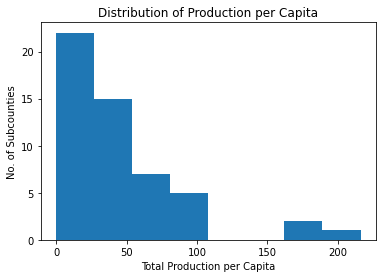

In [ ]:
# Create production per capita
df2subcounty['production_per_capita'] = (
    (df2subcounty['M_Prod_Tot'] + df2subcounty['S_Prod_Tot']) / df2subcounty['POP']
)

plt.figure()
plt.hist(df2subcounty['production_per_capita'], bins=8)
plt.xlabel("Total Production per Capita")
plt.ylabel("No. of Subcounties")
plt.title("Distribution of Production per Capita")
plt.show()

Most of the subcounties have a relatively low production per capita implying food insecurity and the inability of the subcounty to produce enough food for its population.A few of the subcounties are high performing.

In [ ]:
df2subcounty[["S_Yield_Ha","M_Yield_Ha","POP","Crop_Area_Ha"]].describe()

,S_Yield_Ha,M_Yield_Ha,POP,Crop_Area_Ha
count,52.000000,52.000000,52.000000,52.000000
mean,274.165405,940.259552,28934.692308,2839.646974
std,118.569907,321.641901,20865.122974,3110.505917
min,108.156411,0.000000,1418.000000,0.171390
25%,173.034066,743.075879,16558.500000,964.876031
50%,277.255206,1016.684002,23053.500000,1654.265138
75%,368.246437,1203.548665,39461.000000,3267.564651
max,560.313070,1396.991494,100919.000000,13587.990760


From the above summaries,the yields are relatively related to  crop area allocated

Creating onother column for calculating total yield for each subcounty on the subcounty dataframe

In [ ]:
#the fillna of 0 is to ensure any missing value has a zero so that there are no missing values in the total production column.df2subcounty
df2subcounty['Total_Production'] = (
    df2subcounty['M_Prod_Tot'].fillna(0) +
    df2subcounty['S_Prod_Tot'].fillna(0)
)

In [ ]:
df2subcounty.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,production_per_capita,Total_Production
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05,46.056264,1.205817e+06
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05,45.930606,1.347164e+06
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00,0.006013,1.967487e+01
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04,9.719828,3.622575e+05
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05,36.817439,5.903609e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05,58.795656,1.546602e+06
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06,216.034970,5.596386e+06


The columns Total production and production per are now on the dataframe.

Checking for subcounty production per district

In [ ]:
Total_yield=df2subcounty["S_Prod_Tot"]+df2subcounty["M_Prod_Tot"]
df2subcounty["Total_Production"]=Total_yield
district_production= df2subcounty.groupby("DISTRICT_NAME")[["S_Prod_Tot","M_Prod_Tot","Total_Production"]].mean().round(2)
district_production

,S_Prod_Tot,M_Prod_Tot,Total_Production
DISTRICT_NAME,,,
ABIM,245445.11,320355.52,565800.63
AMUDAT,152575.08,886617.33,1039192.41
KAABONG,408792.23,499311.54,908103.77
KOTIDO,2772381.12,335029.85,3107410.96
MOROTO,101266.12,70352.68,171618.80
NAKAPIRIPIRIT,855215.93,1015644.53,1870860.46
NAPAK,276128.98,698422.42,974551.40


 Nakapiriripirit is the leading district in both maize and Sorghum yields while Moroto is the lowest

<p> This exploration indicates that there is unequal crop land allocation whereby large  crop areas are allocated to Sorghum in most subcounties with only a smaller size allocated to maize.This means there are few efforts to have both crops invested in being a potential cause for relatively lower yields.
Crop dominance is not even across the Karamoja regions.Some specialize in
maize while others in sorghum.
Therefore:
 <li>Production is not dependant on the land size.
 <li>Agricultural yield is not relative to population,It varies per region.
 <li>Production per capita varies with some counties showing food security while
others show signs of insecurity

Exporting the data frames back to csv

In [ ]:
df2subcounty.to_csv("karamoja_subcounty_cleaned.csv", index=False)

In [ ]:
df2subcounty.to_csv(r"\Data\Karamoja_subcounty_cleaned"
".csv", index=False)

The cleaned and analysed dataframe is saved ready for export to tableau

## Conclusion

The Karamoja data has a varying trend in every aspect.There is no uniform relationship between Production and Land area allocated,Population or even the crop types.Implying a threatened food insecurity and hence need for serious measures to be put in place to salvage the situation